In [1]:
import torch
import os
import sys
import yaml
from utils import plot_loss, compute_test_metrics

os.chdir("..")
from src.models.simple_mlp import SimpleMLP
from src.datasets.simple_dataset import SimpleDataset
from torch.utils.data import Subset, DataLoader

%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import json
import gzip
import matplotlib.pyplot as plt





In [ ]:
pd.read_excel("data/Train_Data/instance_2021_Q1_2/Explanatory_Variables.xlsx", sheet_name=None)['Initial_Conditions']

In [11]:
gen_names = pd.read_excel("data/Train_Data/instance_2021_Q1_2/Response_Variables.xlsx").columns[1:].tolist()
    
with gzip.open("InputData.json.gz", 'r') as f:
        in_json = f.read().decode("utf-8")
        data = json.loads(in_json)

print(data['Generators']['gen_8a0dcb92']['Minimum downtime (h)'])
print(data['Generators']['gen_8a0dcb92']['Minimum uptime (h)'])
print(data['Generators']['gen_8a0dcb92'])

4.0
1.0
{'Bus': 'b1', 'Type': 'Thermal', 'Production cost curve (MW)': [63.0, 101.0], 'Production cost curve ($)': [4612.46214, 6867.7956], 'Startup costs ($)': [1334.72745, 2224.54575, 4004.18235], 'Startup delays (h)': [4.0, 8.0, 40.0], 'Ramp up limit (MW)': 63.6, 'Ramp down limit (MW)': 238.8, 'Startup limit (MW)': 63.6, 'Shutdown limit (MW)': 238.8, 'Minimum downtime (h)': 4.0, 'Minimum uptime (h)': 1.0, 'Reserve eligibility': [], 'Initial power (MW)': 0.0, 'Initial status (h)': -4.0, 'Commitment status': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]}


In [5]:
with gzip.open("eval/test_data/instance_2021_Q1_9/InputData.json.gz", 'r') as f:
        in_json = f.read().decode("utf-8")
        data = json.loads(in_json)

print(data['Generators']['gen_916ef705']['Minimum downtime (h)'])
print(data['Generators']['gen_916ef705']['Minimum uptime (h)'])
print(data['Generators']['gen_916ef705']['Initial status (h)'])

4.0
4.0
-4.0


In [12]:
data['Generators']['gen_916ef705']['Commitment status'][50:55]


[0, 1, 1, 1, 0]

In [61]:
pd.read_excel("data/Train_Data/instance_2021_Q1_2/Explanatory_Variables.xlsx", sheet_name=None)['Initial_Conditions']

,Unnamed: 0,initial_power,initial_status
0,gen_ab163f99,431.000000,4
1,gen_b42fba47,0.000000,-1
2,gen_4e0ff615,0.000000,-1
3,gen_5f4016ca,0.000000,-1
4,gen_8a0dcb92,101.000000,1
5,gen_179e9575,0.000000,-4
6,gen_6917cd57,0.000000,-4
7,gen_ff58fdf4,0.000000,-1
8,gen_3223a28b,0.000000,-1
9,gen_d5aea532,0.000000,-1


In [78]:
with gzip.open("InputData.json.gz", 'r') as f:
        in_json = f.read().decode("utf-8")
        data = json.loads(in_json)

bad_gen = 'gen_8a0dcb92'
print(data['Generators'][bad_gen]["Minimum downtime (h)"])
print(data['Generators'][bad_gen]["Minimum uptime (h)"])
print(data['Generators'][bad_gen]["Commitment status"][53:60])

4.0
1.0
[0, 0, 0, 0, 1, 1, 1]


4.0
1.0
[0, 0, 0, 0, 1, 1, 1]


In [ ]:
gen_names = pd.read_excel("data/Train_Data/instance_2021_Q1_1/Response_Variables.xlsx").columns[1:].tolist()
    
with gzip.open("data/Train_Data/instance_2021_Q1_1/OutputData.json.gz", 'r') as f:
        in_json = f.read().decode("utf-8")
        data = json.loads(in_json)

uc = {
        key: value
        for key, value in data['Is on'].items() if key in gen_names
    }


In [45]:
pd.read_csv("submission/status_0.csv").drop(columns=["Unnamed: 0"])[["gen_3760182f"]].head(50)

,gen_3760182f
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


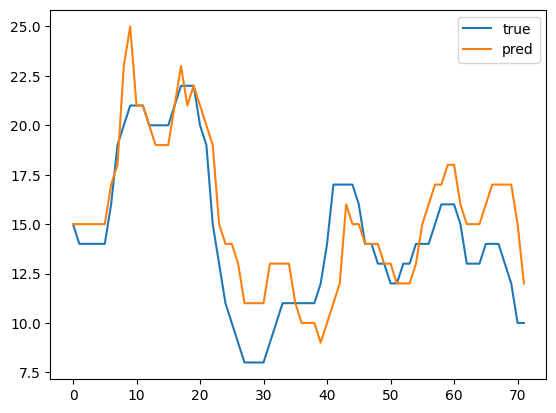

In [42]:
plt.plot(pd.DataFrame(uc).sum(axis=1), label="true")
plt.plot(pd.read_csv("submission/status_0.csv").drop(columns=["Unnamed: 0"]).sum(axis=1), label="pred")
plt.legend()
plt.show()


In [29]:
pd.read_csv("submission/status_0.csv").drop(columns=["Unnamed: 0"]).sum(axis=1)

0     13
1     11
2     10
3      9
4     10
      ..
67    21
68    23
69    21
70    17
71    15
Length: 72, dtype: int64

In [19]:
results_dir = "results/simple_no_round/20251114_104110"
results_dir = "results/simple_round/20251210_001605"

In [29]:
import gurobipy as gp
print(os.getcwd())
example_model_1 = gp.read("data/instance_2021_Q1_1/model.mps")
example_model_2 = gp.read("data/instance_2021_Q1_2/model.mps")
example_model_3 = gp.read("data/instance_2021_Q1_3/model.mps")
example_model_4 = gp.read("data/instance_2021_Q1_4/model.mps")



/Users/wikum/Repositories/ai-ccelerating-uc-agent
Read MPS format model from file data/instance_2021_Q1_1/model.mps
Reading time = 0.04 seconds
: 63518 rows, 38462 columns, 209175 nonzeros
Read MPS format model from file data/instance_2021_Q1_2/model.mps
Reading time = 0.04 seconds
: 63520 rows, 38462 columns, 209177 nonzeros
Read MPS format model from file data/instance_2021_Q1_3/model.mps
Reading time = 0.04 seconds
: 63356 rows, 38462 columns, 209013 nonzeros
Read MPS format model from file data/instance_2021_Q1_4/model.mps
Reading time = 0.04 seconds
: 63426 rows, 38462 columns, 209083 nonzeros


In [33]:
A_1 = example_model_1.getA()
A_2 = example_model_2.getA()
A_3 = example_model_3.getA()
A_4 = example_model_4.getA()

print(A_1.shape)
print(A_2.shape)
print(A_3.shape)
print(A_4.shape)

print(example_model_1.NumBinVars, example_model_1.NumIntVars, example_model_1.NumVars)







(63518, 38462)
(63520, 38462)
(63356, 38462)
(63426, 38462)
19296 19296 38462


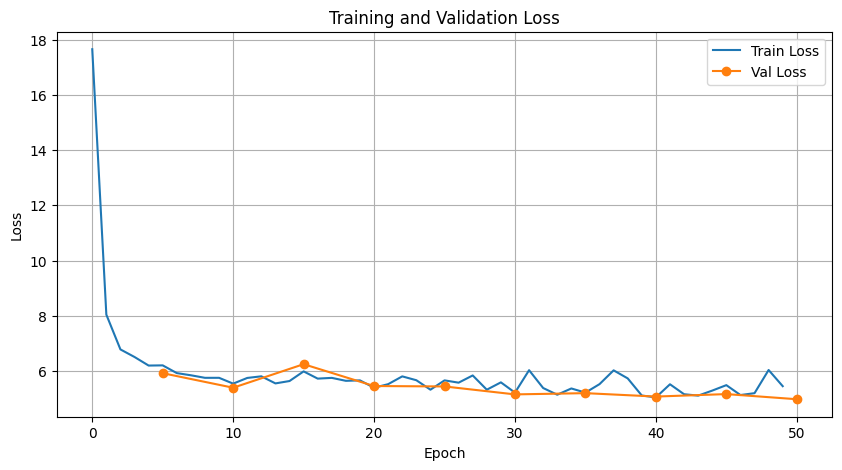

In [20]:
# Plot training loss and validation loss
losses = torch.load(os.path.join(results_dir, "losses.pt"))
plot_loss(losses["train_losses"], losses["val_losses"])

In [21]:
# Set up test dataloader
test_indices = torch.load(os.path.join(results_dir, "test_indices.pt"))
full_dataset = SimpleDataset(data_dir = "data/")
test_dataset = Subset(full_dataset, test_indices)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [22]:
# Load the saved model
model = torch.load(os.path.join(results_dir, "simple_mlp_model.pt"), weights_only=False)
test_metrics = compute_test_metrics(model, test_loader)

In [23]:
test_metrics

{'precision': 0.8993705151960054,
 'recall': 0.8738301188984052,
 'f1_score': 0.886416375772083}